In [1]:
from optical_flow import *
from utils_ import *

In [2]:
directory = 'MPI-Sintel_selection/training/clean/temple_3'
frames = read_frames(directory)
print(f"Read {len(frames)} frames")

flow_directory = 'MPI-Sintel_selection/training/flow/temple_3'
try :
    gt_flows = read_flows(flow_directory)
except:
    gt_flows = []

import argparse
from demo import raft_optflow

parser = argparse.ArgumentParser()
args = parser.parse_args(args=[])
args.model = "models/raft-sintel.pth"
args.path = "MPI-Sintel_selection/training/flow/temple_3"
args.small = False
args.mixed_precision = False
args.alternate_corr = False


Read 50 frames


/home/mkherraz001/RAFT/demo.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(args.model))
/home/mkherraz001/RAFT/core/raft.py:99: Future

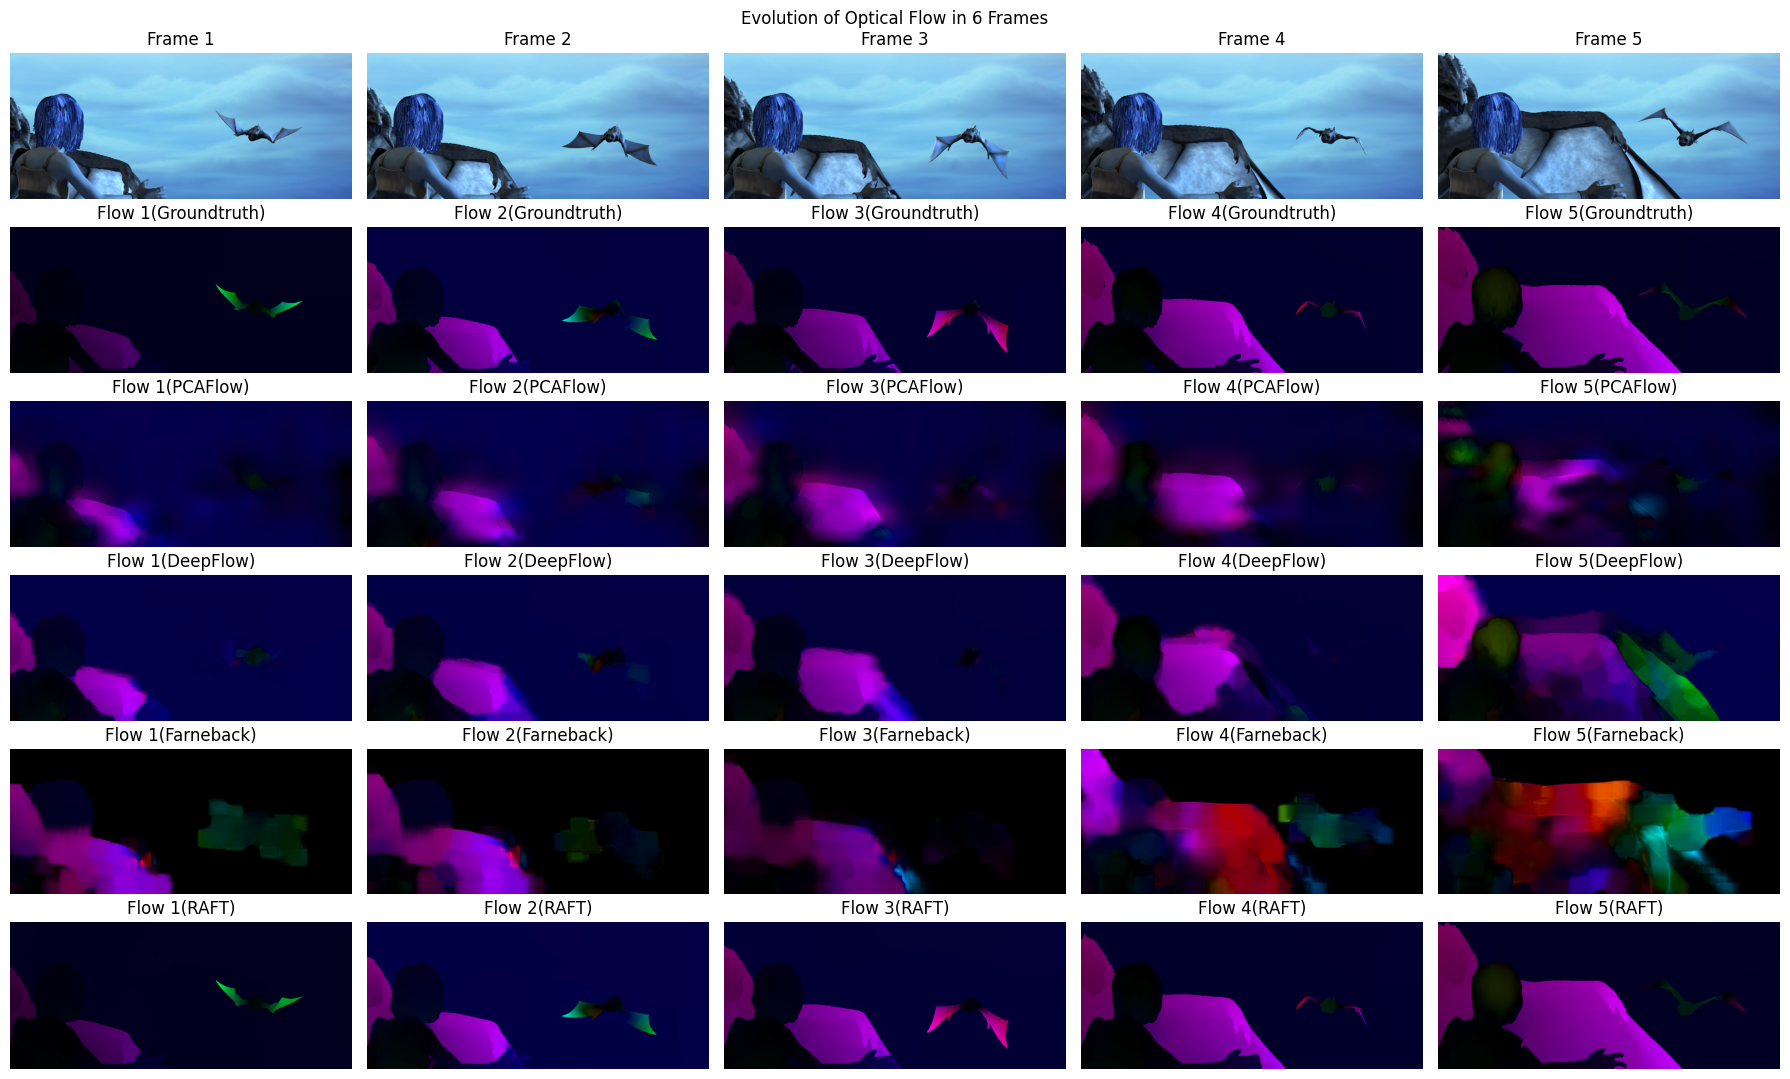

In [3]:
from PIL import Image
import torch

import matplotlib.pyplot as plt

fig, axes = plt.subplots(6, 5, figsize=(18, 11))

prev_flows = [None, None, None, None, None, None]

models = ['Groundtruth', 'PCAFlow', 'DeepFlow', 'Farneback', 'RAFT']

for row in range(6):
    for col in range(5):  # Changed to 6 to add one more frame
        idx = col + 15
        if idx < len(frames) - 1:
            frame1 = frames[idx]
            frame2 = frames[idx + 1]
            if row == 0:
                # flow = gt_flows[idx]
                flow = frame1
            elif row == 1:
                flow = gt_flows[idx]
            elif row == 2:
                flow = pcaflow_optical_flow(frame1, frame2, prev_flow=prev_flows[row])
            elif row == 3:
                flow = deepflow_optical_flow(frame1, frame2, prev_flow=prev_flows[row])
            elif row == 4:
                flow = farneback_optical_flow(frame1, frame2, prev_flow=prev_flows[row])
            elif row == 5:
                flow = raft_optflow(frame1, frame2, args)
                
            prev_flows[row] = flow
            if row == 0:
                axes[row, col].imshow(flow)
                axes[row, col].axis('off')
                axes[row, col].set_title(f'Frame {col + 1}')
            else:
                axes[row, col].imshow(flow2bgr(flow))
                axes[row, col].axis('off')
                axes[row, col].set_title(f'Flow {col + 1}({models[row-1]})')

for row in range(5):
    axes[row, 0].set_ylabel(models[row], rotation=0, labelpad=40, size='large')

plt.suptitle('Evolution of Optical Flow in 6 Frames')
plt.tight_layout()
plt.show()


In [4]:
for flow in prev_flows:
    if flow is not None:
        print(flow.shape)
        print(flow.min(), flow.max())
        print()

(436, 1024, 3)
0 255

(436, 1024, 2)
-83.44906 81.16592

(436, 1024, 2)
-52.60539 58.66819

(436, 1024, 2)
-49.715813 36.97062

(436, 1024, 2)
-19.369764 23.659365

(440, 1024, 2)
-83.5011 85.15143



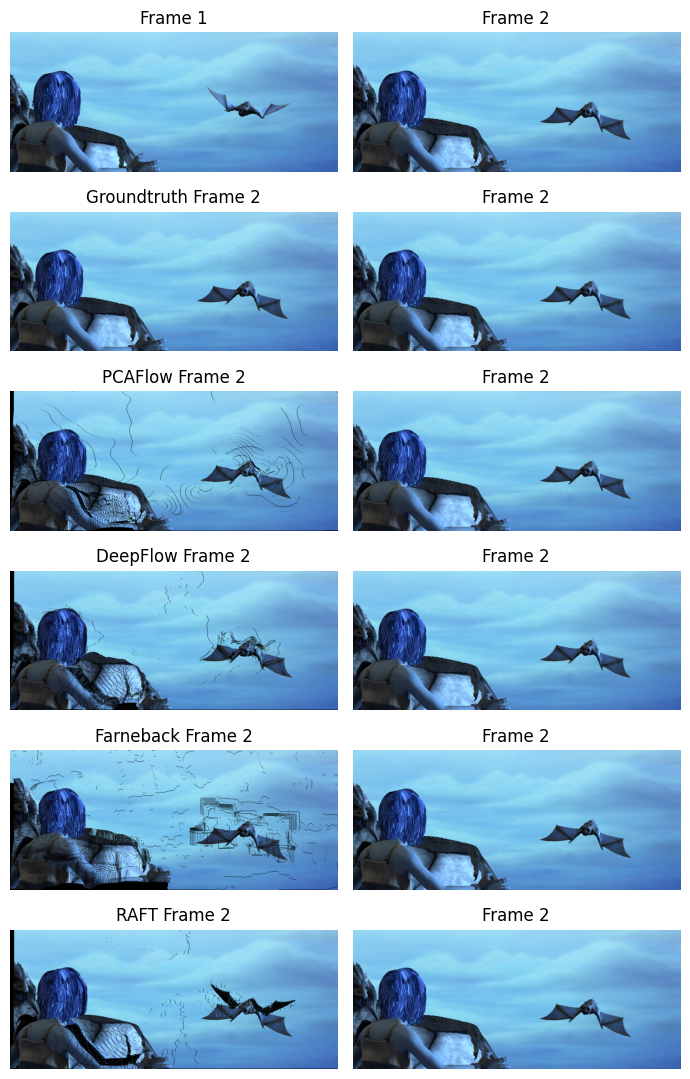

In [5]:
frame1 = frames[15]
frame2 = frames[16]

flow = raft_optflow(frame1, frame2, args)
raft_frame2 = project(frame2, flow)

pca_flow = pcaflow_optical_flow(frame1, frame2)
pca_frame2 = project(frame2, pca_flow)

deepflow_flow = deepflow_optical_flow(frame1, frame2)
deepflow_frame2 = project(frame2, deepflow_flow)

farneback_flow = farneback_optical_flow(frame1, frame2)
farneback_frame2 = project(frame2, farneback_flow)

fig, axes = plt.subplots(6, 2, figsize=(7, 11))

for row in range(6):
    for col in range(2):
        if col == 1:
            axes[row, col].imshow(frame2)
            axes[row, col].axis('off')
            axes[row, col].set_title(f'Frame 2')
        else:
            if row == 0:
                axes[row, col].imshow(frame1)
                axes[row, col].axis('off')
                axes[row, col].set_title(f'Frame 1')
            elif row == 1:
                axes[row, col].imshow(frame2)
                axes[row, col].axis('off')
                axes[row, col].set_title(f'Groundtruth Frame 2')
            elif row == 2:
                axes[row, col].imshow(pca_frame2)
                axes[row, col].axis('off')
                axes[row, col].set_title(f'PCAFlow Frame 2')
            elif row == 3:
                axes[row, col].imshow(deepflow_frame2)
                axes[row, col].axis('off')
                axes[row, col].set_title(f'DeepFlow Frame 2')
            elif row == 4:
                axes[row, col].imshow(farneback_frame2)
                axes[row, col].axis('off')
                axes[row, col].set_title(f'Farneback Frame 2')
            elif row == 5:
                axes[row, col].imshow(raft_frame2)
                axes[row, col].axis('off')
                axes[row, col].set_title(f'RAFT Frame 2')
plt.tight_layout()
plt.show()

In [6]:
directory = 'GITW_selection/CanOfCocaCola/CanOfCocaColaPlace3Subject1/Frames'
frames = read_frames(directory)
print(f"Read {len(frames)} frames")

gt_flows = []

Read 235 frames


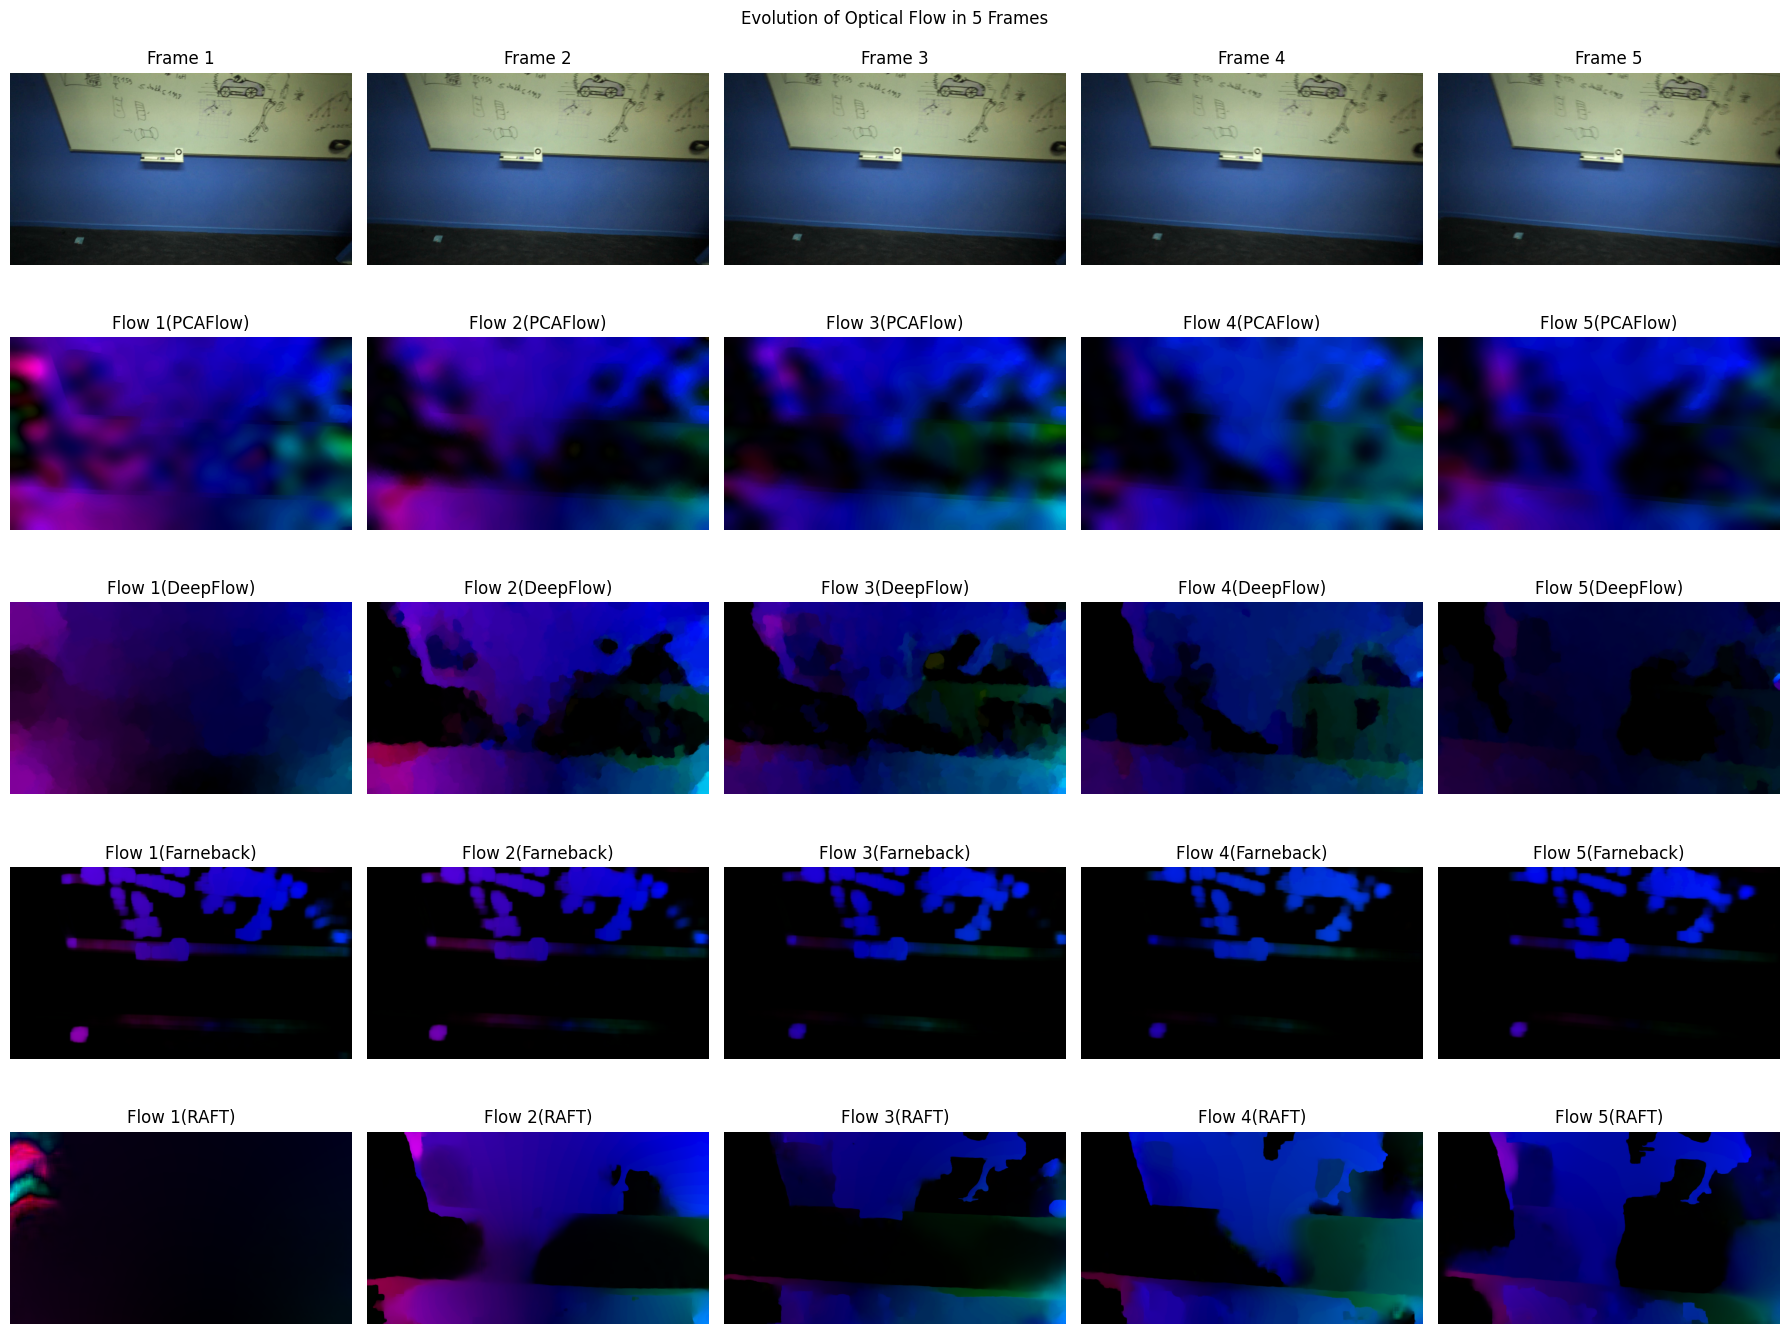

In [7]:
from PIL import Image
import torch

import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 5, figsize=(18, 14))

prev_flows = [None, None, None, None, None]

models = [ 'Groundtruth', 'PCAFlow', 'DeepFlow', 'Farneback', 'RAFT']

for row in range(5):
    for col in range(5):
        idx = col + 15
        if idx < len(frames) - 1:
            frame1 = frames[idx]
            frame2 = frames[idx + 1]
            if row == 0:
                # flow = gt_flows[idx]
                flow = frame1
            elif row == 1:
                flow = pcaflow_optical_flow(frame1, frame2, prev_flow=prev_flows[row])
            elif row == 2:
                flow = deepflow_optical_flow(frame1, frame2, prev_flow=prev_flows[row])
            elif row == 3:
                flow = farneback_optical_flow(frame1, frame2, prev_flow=prev_flows[row])
            elif row == 4:
                flow = raft_optflow(frame1, frame2, args)
                
                
            prev_flows[row] = flow
            if row == 0:
                axes[row, col].imshow(flow)
                axes[row, col].axis('off')
                axes[row, col].set_title(f'Frame {col + 1}')
            else:
                axes[row, col].imshow(flow2bgr(flow))
                axes[row, col].axis('off')
                axes[row, col].set_title(f'Flow {col + 1}({models[row]})')

for row in range(5):
    axes[row, 0].set_ylabel(models[row], rotation=0, labelpad=40, size='large')

plt.suptitle('Evolution of Optical Flow in 5 Frames')
plt.tight_layout()
plt.show()

In [8]:
for flow in prev_flows:
    if flow is not None:
        print(flow.shape)
        print(flow.min(), flow.max())
        print()

(1080, 1920, 3)
0 255

(1080, 1920, 2)
-11.014845 33.551155

(1080, 1920, 2)
-27.971294 103.667915

(1080, 1920, 2)
-7.52011 31.492937

(1080, 1920, 2)
-19.025047 41.251137

